In [2]:
import pandas as pd

In [3]:
pd.set_option('display.max_columns', None)

In [6]:
df1 = pd.read_csv('hps_04_00_02_puf.csv')
df1

,SCRAM,CYCLE,EST_ST,EST_MSA,REGION,HWEIGHT,PWEIGHT,TBIRTH_YEAR,ABIRTH_YEAR,RHISPANIC,AHISPANIC,RRACE,ARACE,EEDUC,AEDUC,MS,EGENID_BIRTH,AGENID_BIRTH,GENID_DESCRIBE,SEXUAL_ORIENTATION,THHLD_NUMPER,AHHLD_NUMPER,THHLD_NUMKID,AHHLD_NUMKID,THHLD_NUMADLT,KIDS_LT5Y,KIDS_5_11Y,KIDS_12_17Y,ENRPUBCHK,ENRPRVCHK,ENRHMSCHK,TENROLLPUB,TENROLLPRV,TENROLLHMSCH,ENROLLNONE,ACTVDUTY1,ACTVDUTY2,ACTVDUTY3,ACTVDUTY4,ACTVDUTY5,RECVDVACC,HADCOVIDRV,SYMPTOMS,LONGCOVID,SYMPTMNOW,WRKLOSSRV,ANYWORK,KINDWORK,RSNNOWRKRV,EXPNS_DIF,TWDAYS,CURFOODSUF,CHILDFOOD,FOODRSNRV1,FOODRSNRV2,FOODRSNRV3,FOODRSNRV4,FREEFOOD,SCHLFDHLP_RV1,SCHLFDHLP_RV2,SCHLFDHLP_RV3,SCHLFDHLP_RV4,SCHLFDHLP_RV5,FDBENEFIT1,ANXIOUS,WORRY,INTEREST,DOWN,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,PRIVHLTH,PUBHLTH,SEEING,HEARING,REMEMBERING,MOBILITY,SELFCARE,UNDERSTAND,TENURE,RENTCHNG,LIVQTRRV,RENTCUR,MORTCUR,TMNTHSBHND,EVICT,FORCLOSE,ENERGY,HSE_TEMP,ENRGY_BILL,INCOME,SYMPTMIMPCT,PRICECHNG,PRICESTRESS,PRICECONCRN,TWDAYS_RESP,FRMLA_YN,FRMLA_AGE,FRMLA_DIFFCLT,GAS1,GAS2,GAS3,GAS4,SCHLFDHLP_RV6,SCHLFDHLP_RV7,SCHLFDHLP_RV8,FDBENEFIT2,SCHLFDEXPNS,ND_DISPLACE,ND_TYPE1,ND_TYPE2,ND_TYPE3,ND_TYPE4,ND_TYPE5,ND_HOWLONG,ND_DAMAGE,ND_FDSHRTAGE,ND_WATER,ND_ELCTRC,ND_UNSANITARY,ND_ISOLATE,ND_CRIME,ND_SCAM,FDBENEFIT3,BABY_FED,MHLTH_NEED,MHLTH_GET,MHLTH_SATISFD,MHLTH_DIFFCLT,MOVEWHY1,MOVEWHY2,MOVEWHY3,MOVEWHY4,MOVEWHY5,MOVEWHY6,MOVEWHY7,MOVEWHY8,MOVED,WHENCOVIDRV1,WHENCOVIDRV2,WHENCOVIDRV3,VETERAN1,VETERAN2,VETERAN3,VETERAN4,VETERAN5,CHILDCARE,CHILDCARE_RSLT1,CHILDCARE_RSLT2,CHILDCARE_RSLT3,CHILDCARE_RSLT4,CHILDCARE_RSLT5,CHILDCARE_RSLT6,CHILDCARE_RSLT7,CHILDCARE_RSLT8,CHILDCARE_RSLT9,SOCIAL1,SOCIAL2,SUPPORT1,SUPPORT2,SUPPORT3,SUPPORT4,SUPPORT1EXP,RVACCDATE,RSVVACC
0,P020000001,2,32,NaN,4,704.966315,2067.690868,1976,1,1,2,2,2,6,2,4,2,2,2,2,3,2,0,2,3,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-99,-99,-99,-99,-99,1,-99,-88,-88,-88,-99,-99,-88,-88,1,-99,2,-88,-99,1,1,-99,2,-88,-88,-88,-88,-88,1,4,4,4,4,-99,-99,-99,1,-99,-99,-99,-99,3,1,3,1,3,2,3,1,3,2,6,1,-88,-88,-88,-88,2,2,3,2,-88,4,-88,2,-88,-88,-88,-88,-99,-99,-99,-99,-88,-88,-88,-99,-88,-99,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-99,-88,-88,-88,-88,-88,-99,-99,-99,-99,-99,1,-99,-99,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,5,3,2,1,4,1,2,-99,-88
1,P020000002,2,53,NaN,4,716.582115,1359.474802,1961,2,1,2,1,2,5,2,3,2,2,-88,2,2,2,0,2,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-99,-99,-99,-99,-99,-99,-88,-88,-88,-99,-99,-88,-88,-99,4,-99,-88,-88,-88,-88,-88,-99,-88,-88,-88,-88,-88,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99,3,3,-99,-99,-99,-99,-99,-99,-99,-88,-99,-88,-88,-88,-88,-88,-99,-99,-99,-99,-88,-99,-88,-99,-88,-88,-88,-88,-99,-99,-99,-99,-88,-88,-88,-99,-88,-99,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-99,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-99,-99,-99,-99,-99,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-99,-99,-99,-99,-99,-99,-99,-88,-99
2,P020000003,2,6,31080.0,4,2439.529962,4554.378984,1988,2,1,2,1,2,7,2,1,2,2,2,3,2,2,0,2,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-99,-99,-99,-99,1,1,3,2,2,2,1,1,-88,1,1,1,-88,-88,-88,-88,-88,2,-88,-88,-88,-88,-88,-99,2,2,2,2,1,2,2,2,2,1,2,2,1,1,1,1,1,1,1,1,2,-88,2,-88,1,-88,-88,-88,4,4,4,7,-88,4,-88,4,1,-88,-88,-88,-99,-99,-99,1,-88,-88,-88,-99,-88,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-99,-99,1,-99,1,-99,1,-99,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,4,2,2,1,1,4,1,-88
3,P020000004,2,48,NaN,2,3945.461037,7550.581707,1956,2,1,2,1,2,5,2,1,1,2,-88,2,2,2,0,2,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-99,-99,-99,-99,1,2,-88,-88,-88,2,1,-99,-88,2,4,2,-88,1,-99,-99,-99,2,-88,-88,-88,-88,-88,-99,1,1,1,1,2,2,1,2,2,2,2,2,2,1,2,3,1,1,1,1,2,-88,2,-88,1,-88,-88,-88,4,4,4,2,-88,1,2,1,-88,-88,-88,-88,1,-99,-99,-99,-88,-88,-88,-99,-88,2,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,1,-88,-88,-88,-88,-88,-88,-88,-88,-88,-88,-

In [7]:
# Filter the dataset to include only records with TWDAYS values 1, 2, or 3
filtered_data = df1[df1['TWDAYS'].isin([1, 2, 3])]

# Basic EDA on the filtered dataset
# Count of records by state
state_distribution = filtered_data['EST_ST'].value_counts()

# Summary statistics for telework days
telework_days_summary = filtered_data['TWDAYS'].describe()

state_distribution, telework_days_summary

(EST_ST
 6     2069
 53    1179
 48    1164
 25     810
 51     802
 8      776
 24     727
 12     711
 42     669
 13     637
 4      631
 41     622
 26     583
 17     582
 49     568
 36     558
 27     522
 11     517
 34     456
 37     447
 55     429
 9      419
 29     378
 47     377
 39     361
 18     356
 33     304
 35     297
 19     289
 20     287
 16     281
 45     280
 21     258
 40     242
 31     233
 32     226
 2      222
 44     213
 23     208
 50     206
 1      206
 5      192
 10     182
 15     170
 22     167
 30     163
 46     161
 28     116
 54     114
 38      95
 56      73
 Name: count, dtype: int64,
 count    22535.000000
 mean         2.191879
 std          0.870824
 min          1.000000
 25%          1.000000
 50%          2.000000
 75%          3.000000
 max          3.000000
 Name: TWDAYS, dtype: float64)

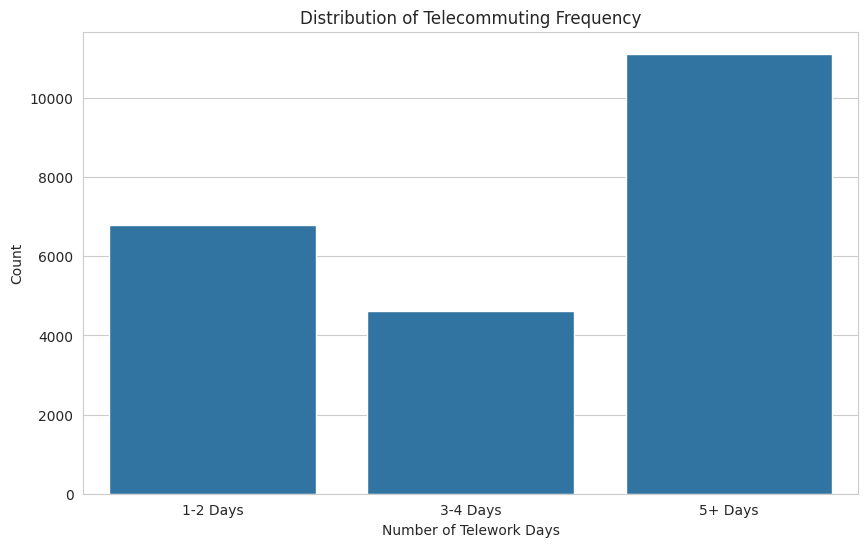

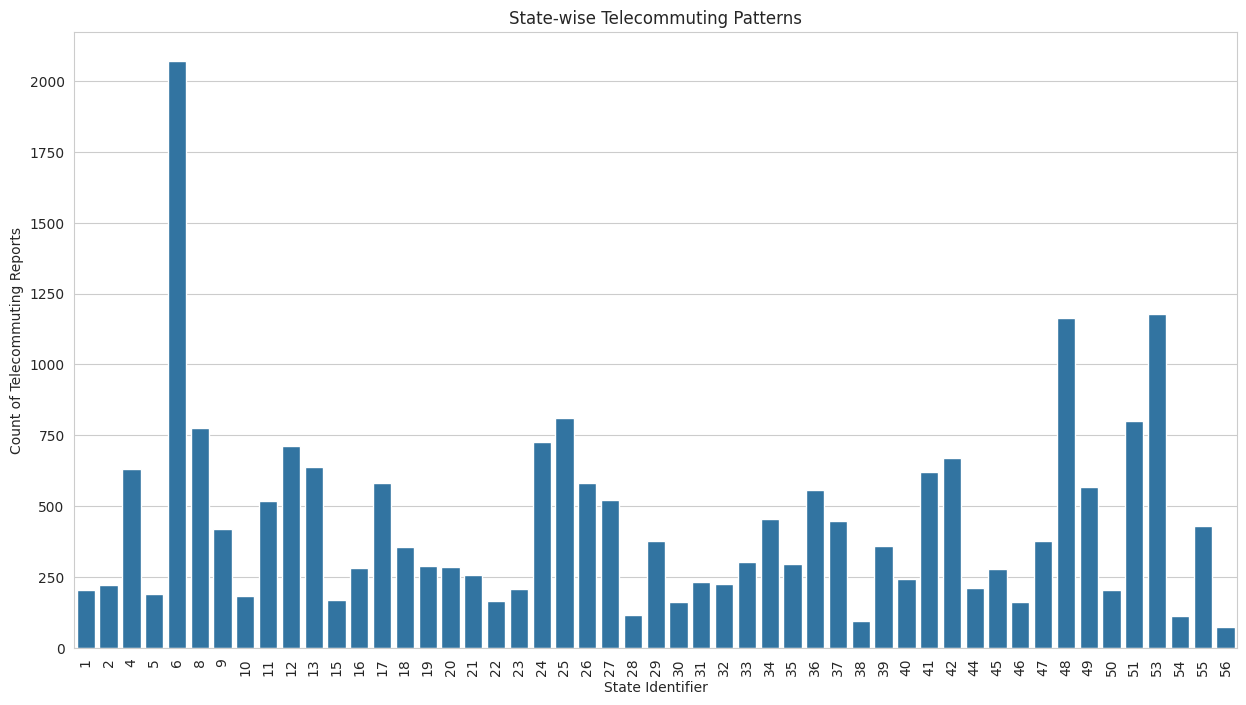

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Telecommuting Frequency Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='TWDAYS', data=filtered_data)
plt.title('Distribution of Telecommuting Frequency')
plt.xlabel('Number of Telework Days')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1-2 Days', '3-4 Days', '5+ Days'])
plt.show()

# State-wise Telecommuting Patterns
plt.figure(figsize=(15, 8))
state_counts = filtered_data['EST_ST'].value_counts().sort_index()
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.title('State-wise Telecommuting Patterns')
plt.xlabel('State Identifier')
plt.ylabel('Count of Telecommuting Reports')
plt.xticks(rotation=90)
plt.show()


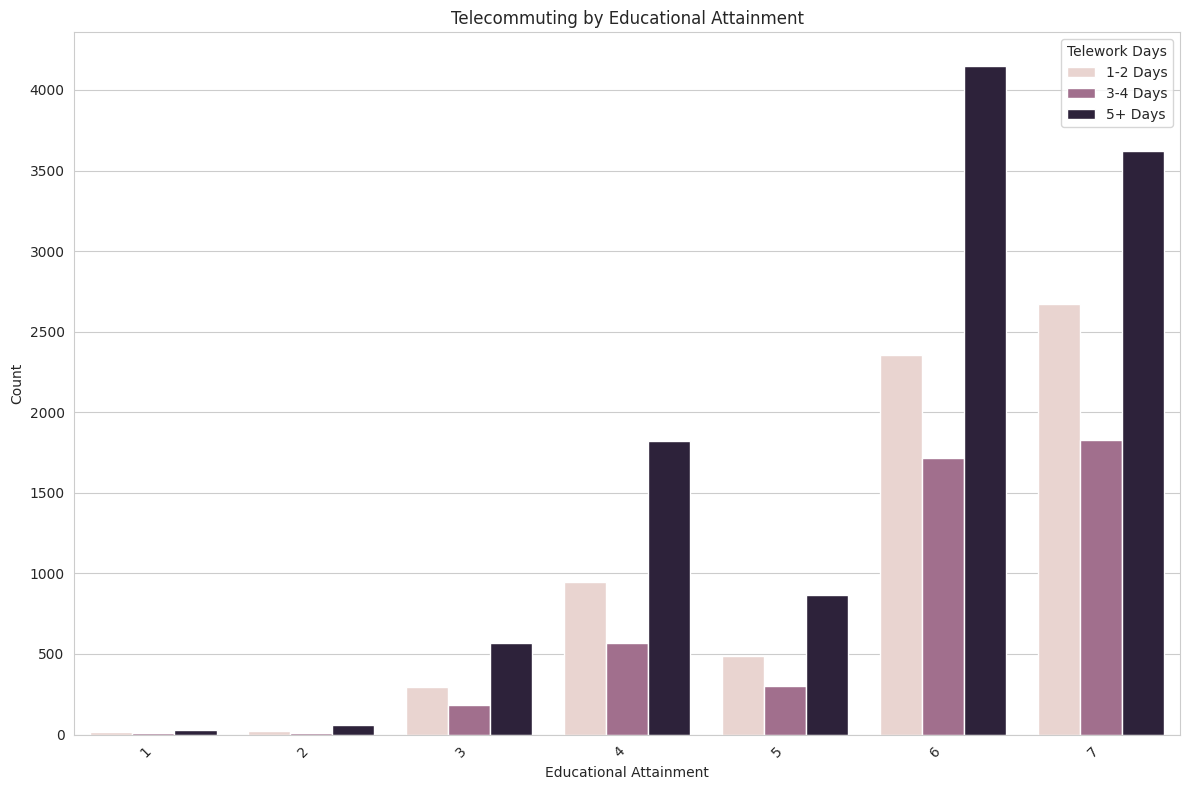

In [9]:
# Telecommuting by Educational Attainment
plt.figure(figsize=(12, 8))
sns.countplot(x='EEDUC', hue='TWDAYS', data=filtered_data)
plt.title('Telecommuting by Educational Attainment')
plt.xlabel('Educational Attainment')
plt.ylabel('Count')
plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

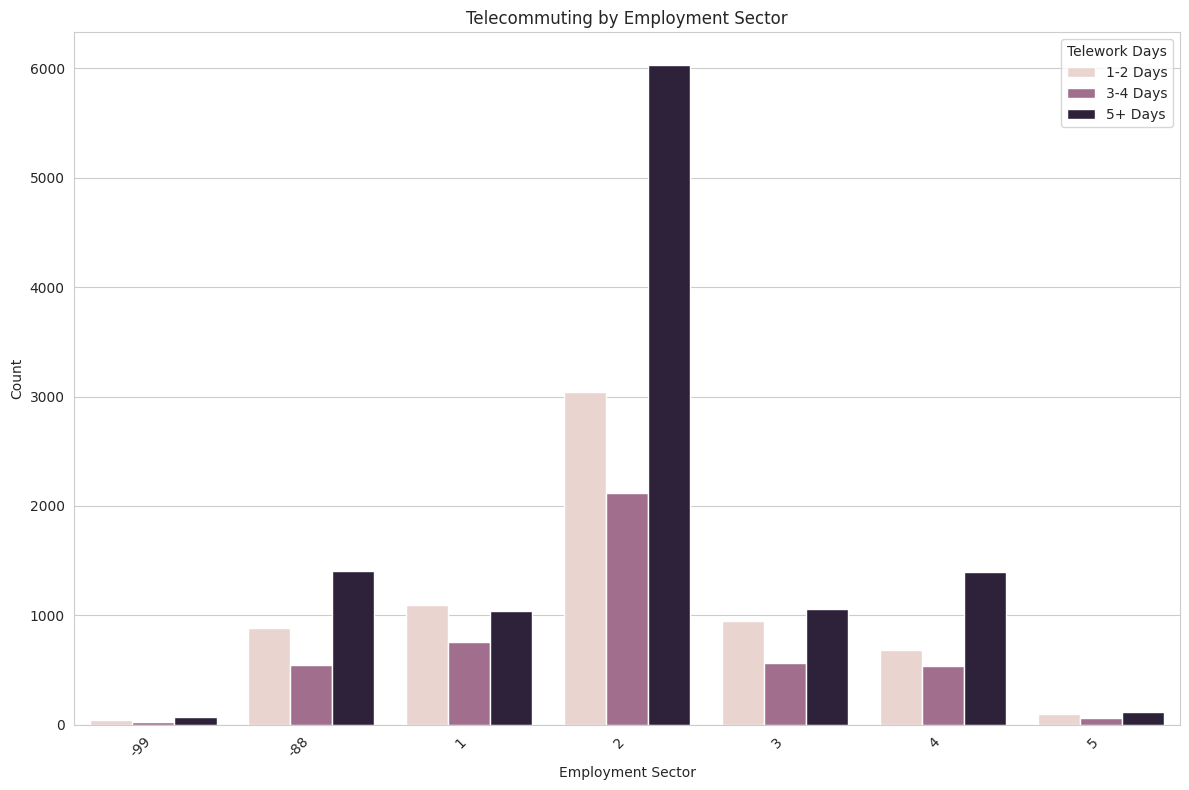

In [10]:
# Telecommuting by Employment Sector
plt.figure(figsize=(12, 8))
sns.countplot(x='KINDWORK', hue='TWDAYS', data=filtered_data)
plt.title('Telecommuting by Employment Sector')
plt.xlabel('Employment Sector')
plt.ylabel('Count')
plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-11-06fd0fa6125a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['CHILDREN_PRESENT'] = filtered_data[['KIDS_LT5Y', 'KIDS_5_11Y', 'KIDS_12_17Y']].max(axis=1) > 0


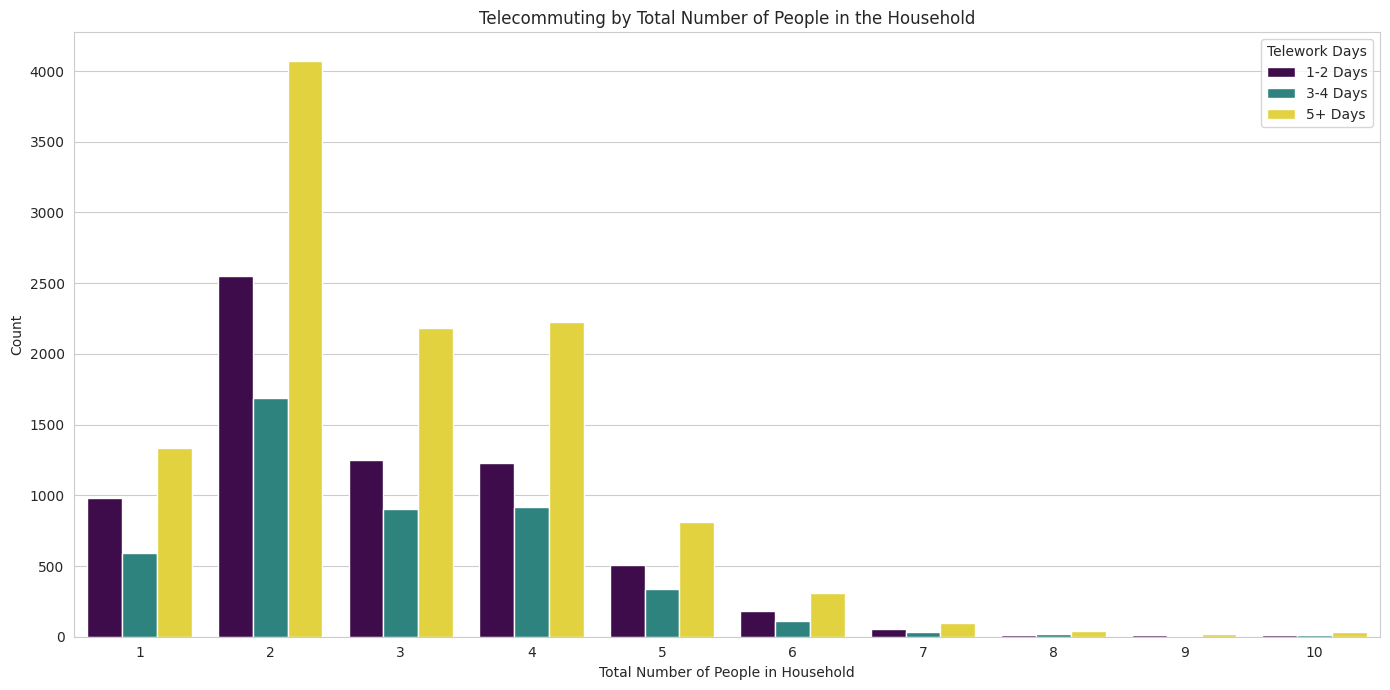

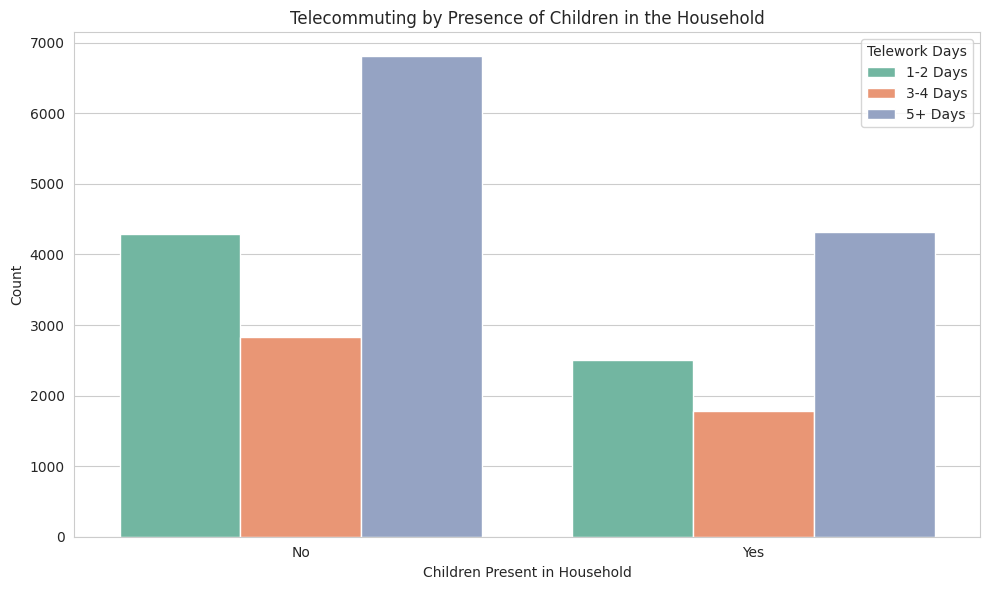

In [11]:
# Visualizing Telecommuting by Total Number of People in the Household
plt.figure(figsize=(14, 7))
sns.countplot(x='THHLD_NUMPER', hue='TWDAYS', data=filtered_data, palette='viridis')
plt.title('Telecommuting by Total Number of People in the Household')
plt.xlabel('Total Number of People in Household')
plt.ylabel('Count')
plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
plt.tight_layout()

# Visualizing Telecommuting by Presence of Children in the Household
# For simplicity, combining children count variables into a binary presence of children in household variable
filtered_data['CHILDREN_PRESENT'] = filtered_data[['KIDS_LT5Y', 'KIDS_5_11Y', 'KIDS_12_17Y']].max(axis=1) > 0
plt.figure(figsize=(10, 6))
sns.countplot(x='CHILDREN_PRESENT', hue='TWDAYS', data=filtered_data, palette='Set2')
plt.title('Telecommuting by Presence of Children in the Household')
plt.xlabel('Children Present in Household')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
plt.tight_layout()

plt.show()

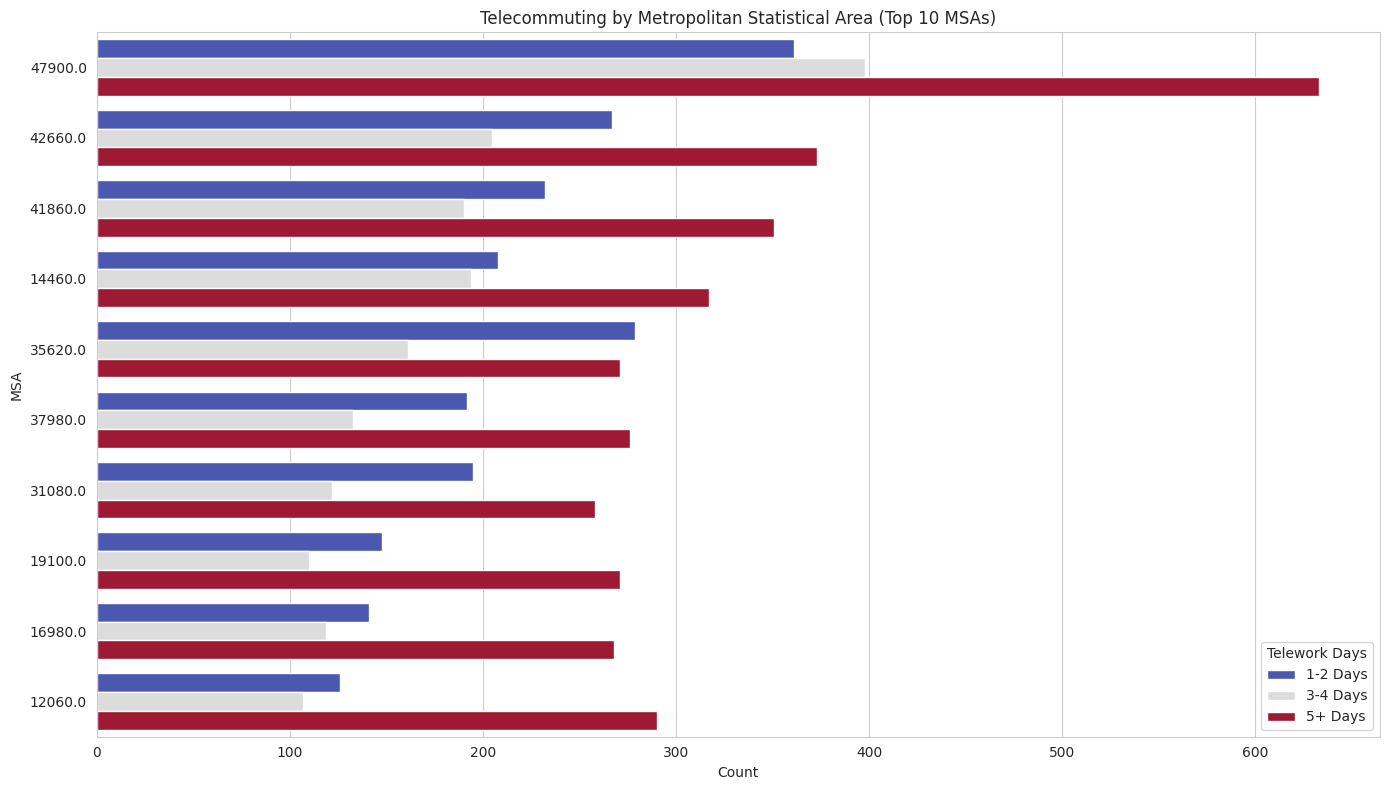

In [12]:
# Given the potentially large number of MSAs, we'll focus on the top 10 MSAs by count of telecommuting reports for clarity in visualization.

# Identifying the top 10 MSAs by count of telecommuting reports
top_msas = filtered_data['EST_MSA'].value_counts().nlargest(10).index

# Filtering data for top 10 MSAs
top_msa_data = filtered_data[filtered_data['EST_MSA'].isin(top_msas)]

# Visualizing Telecommuting by MSA
plt.figure(figsize=(14, 8))
sns.countplot(y='EST_MSA', hue='TWDAYS', data=top_msa_data, palette='coolwarm', order=top_msas)
plt.title('Telecommuting by Metropolitan Statistical Area (Top 10 MSAs)')
plt.xlabel('Count')
plt.ylabel('MSA')
plt.legend(title='Telework Days', labels=['1-2 Days', '3-4 Days', '5+ Days'])
plt.tight_layout()

plt.show()